In [19]:
# prompt: okay , i am giving you a link of csv file
# /content/drive/MyDrive/code/data.csv

# Assuming you have already mounted Google Drive as shown in previous examples.
# You can then directly access the CSV file using its path.

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/code/data.csv')

# Now you can work with the dataframe 'df'.
# For example, you can print the first 5 rows:
df.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
# prompt: to remove warnings

import warnings
warnings.filterwarnings('ignore')


In [21]:
# prompt: i have uploaded the data. now i want to understand high level statistics about dataset and i also want to do pre - processing to check the quality of data. can you recommend steps along with code

import pandas as pd
# Check for missing values
print(df.isnull().sum())



id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [22]:
# Describe the dataset (basic statistics)
print(df.describe())



                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [23]:
# Check data types of columns
print(df.dtypes)



id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [24]:
# Check for duplicate rows
print(df.duplicated().sum())



0


In [25]:
# prompt: what type data value is diagnosis column and their count

diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)
print(f"Data type of 'diagnosis' column: {df['diagnosis'].dtype}")


diagnosis
B    357
M    212
Name: count, dtype: int64
Data type of 'diagnosis' column: object


In [26]:

# Remove any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Check the data type of the 'diagnosis' column
print("Data type of 'diagnosis' column before conversion:", df['diagnosis'].dtype)

# Convert 'diagnosis' column to string (if not already)
df['diagnosis'] = df['diagnosis'].astype(str)

# Clean the 'diagnosis' column: strip spaces and convert to uppercase
df['diagnosis'] = df['diagnosis'].str.strip().str.upper()

# Check unique values in the 'diagnosis' column after cleaning
print("Unique values in diagnosis column:", df['diagnosis'].unique())

# Map 'B' to 0 and 'M' to 1 to create the 'cancer_Diag' column
df['cancer_Diag'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Check for NaN values in 'cancer_Diag' column
if df['cancer_Diag'].isnull().any():
    print("NaN values found in 'cancer_Diag' column. Unique values in 'diagnosis':", df['diagnosis'].unique())

# Print the data type of 'cancer_Diag' column and the first few rows of the DataFrame
print(f"Data type of 'cancer_Diag' column: {df['cancer_Diag'].dtype}")
print(df.head())


Data type of 'diagnosis' column before conversion: object
Unique values in diagnosis column: ['M' 'B']
Data type of 'cancer_Diag' column: int64
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520

In [27]:
# prompt: head of cancer_Diag

print(df['cancer_Diag'].head())


0    1
1    1
2    1
3    1
4    1
Name: cancer_Diag, dtype: int64


In [28]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,cancer_Diag
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [29]:
# prompt: why diagnosis column not showing 0and 1 value as we changed above

# Display the unique values in the 'diagnosis' column
print(df['diagnosis'].unique())


['M' 'B']


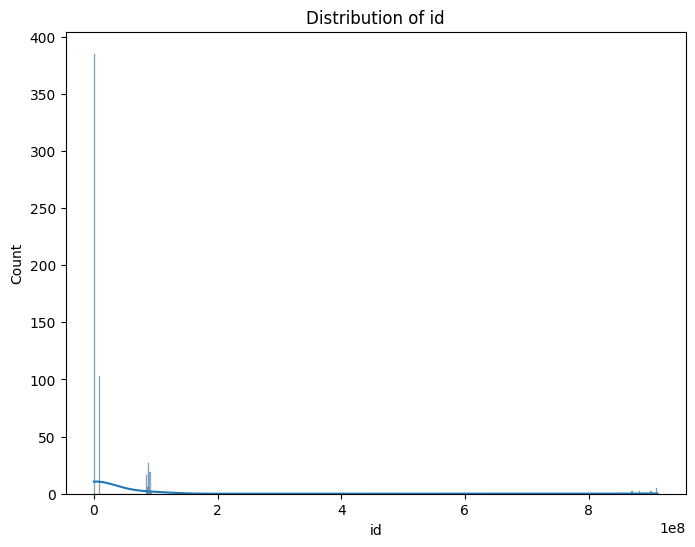

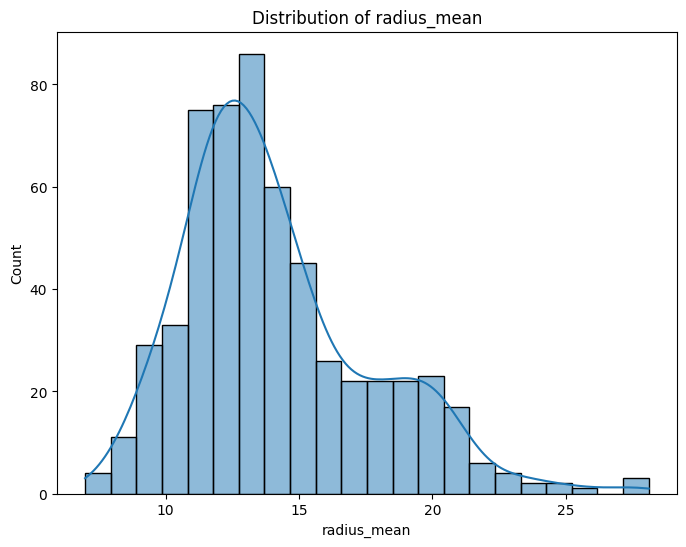

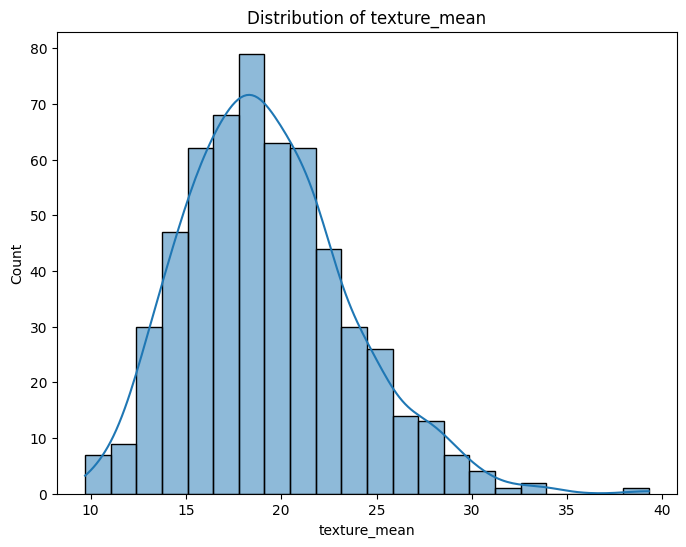

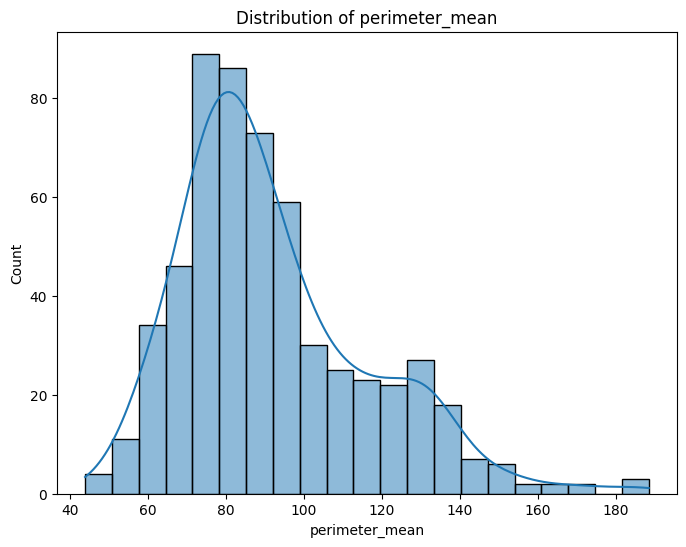

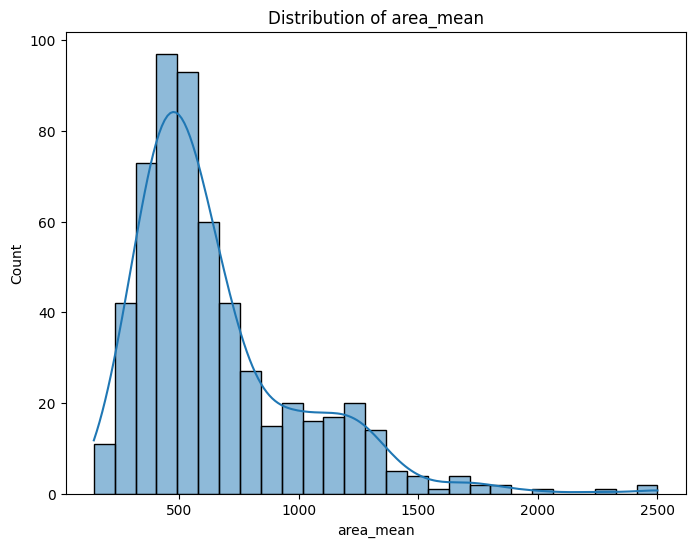

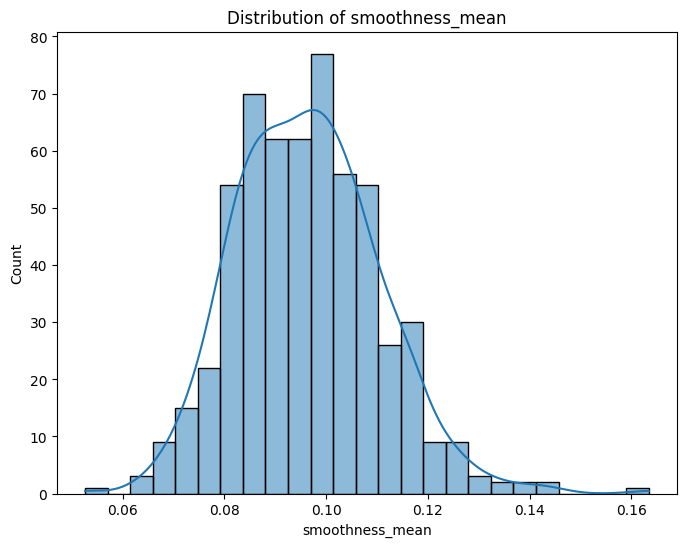

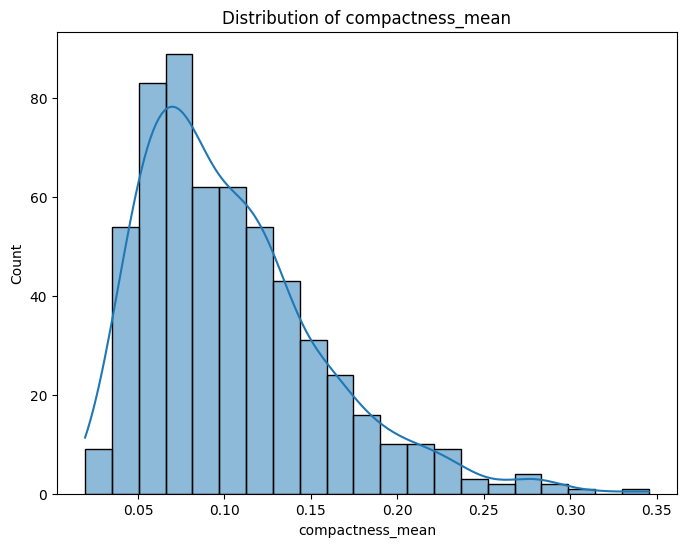

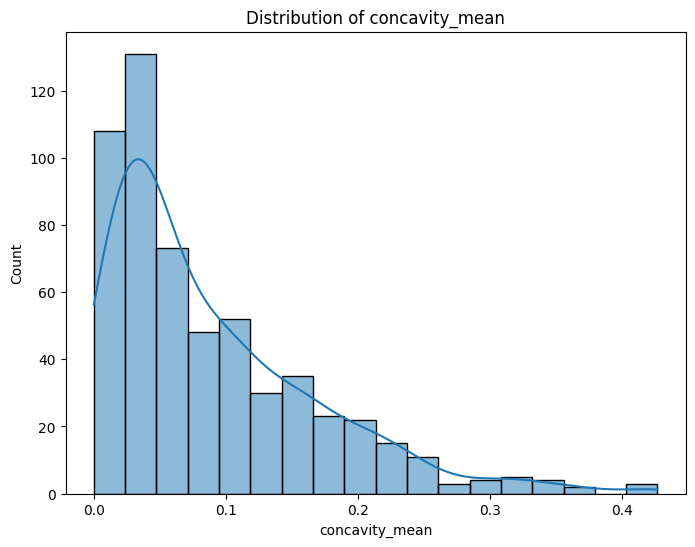

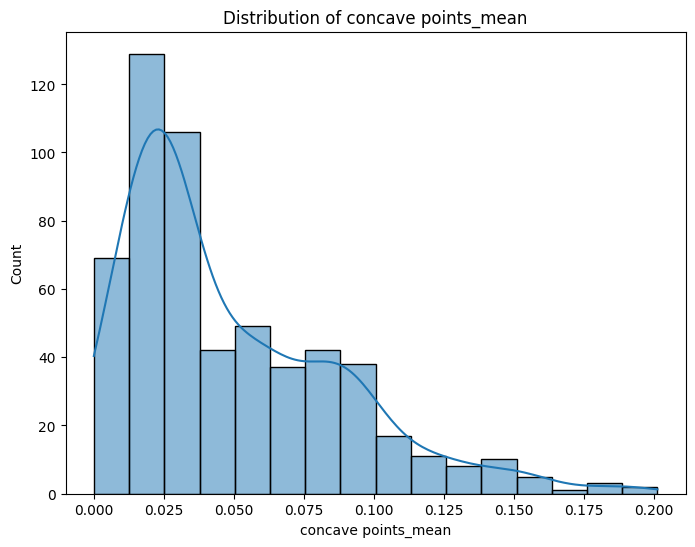

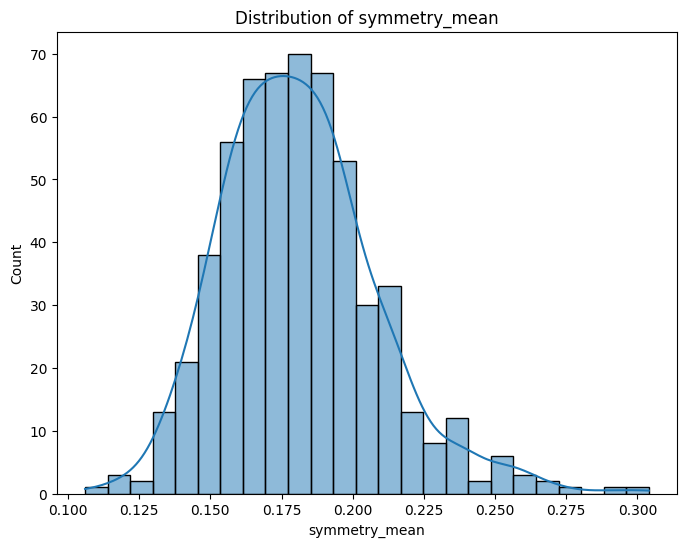

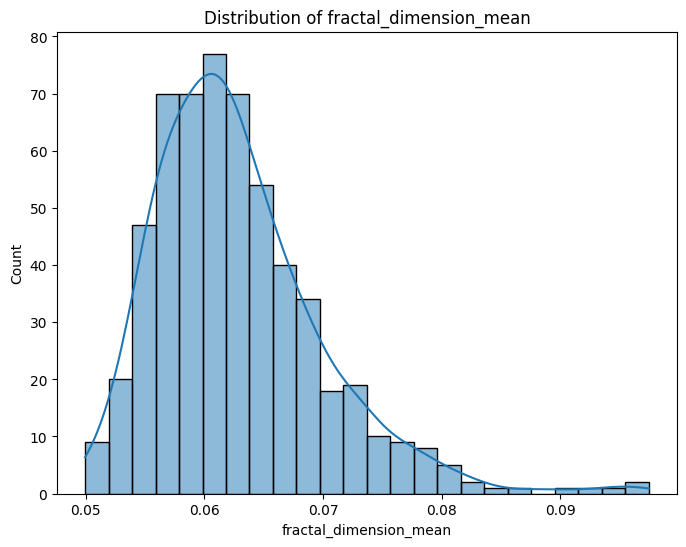

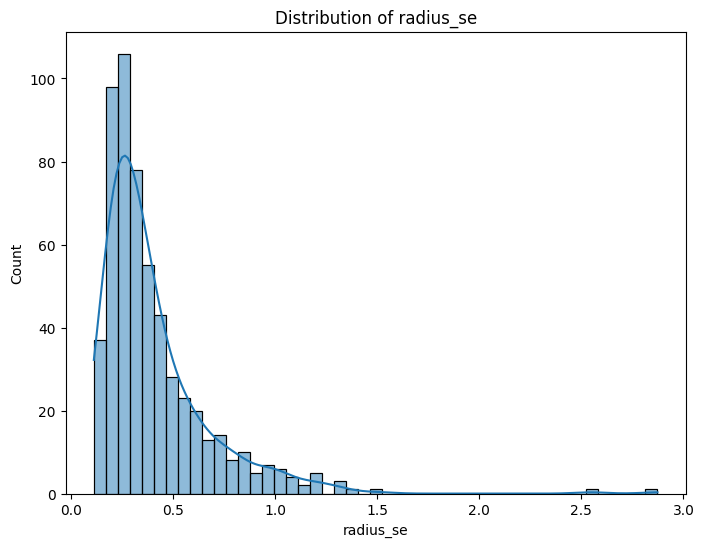

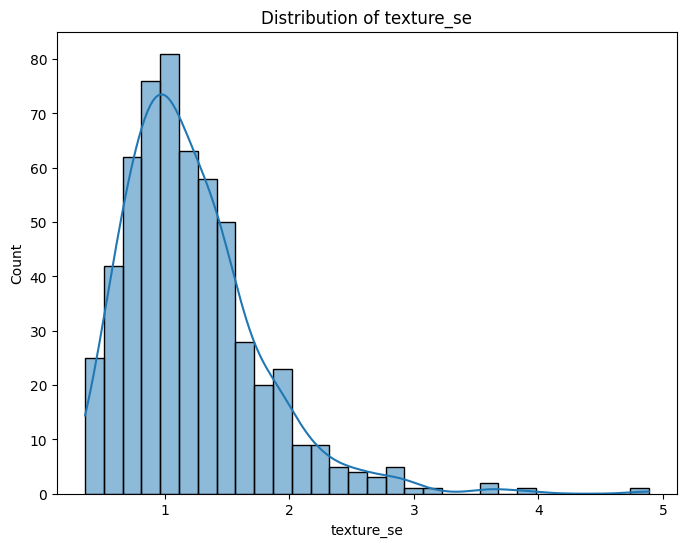

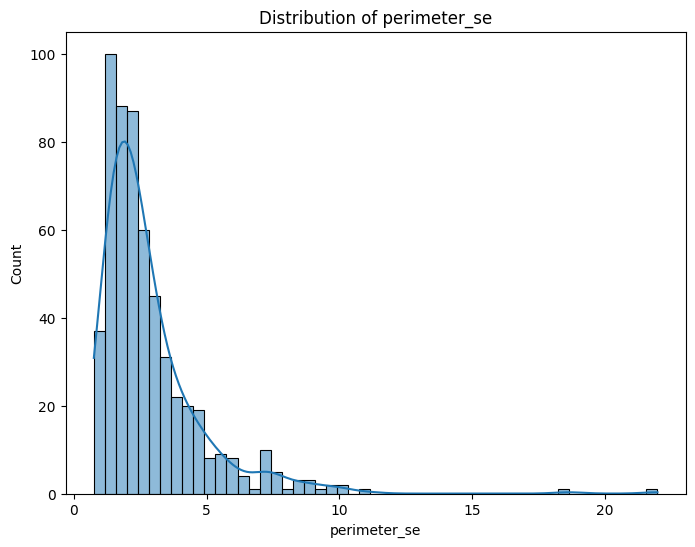

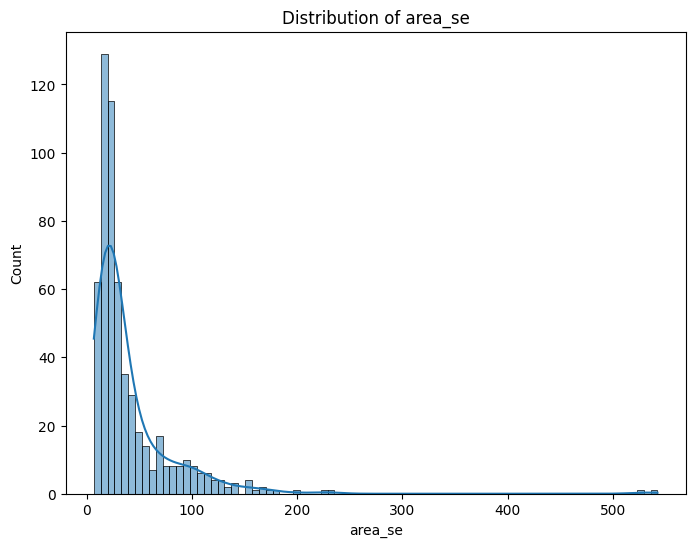

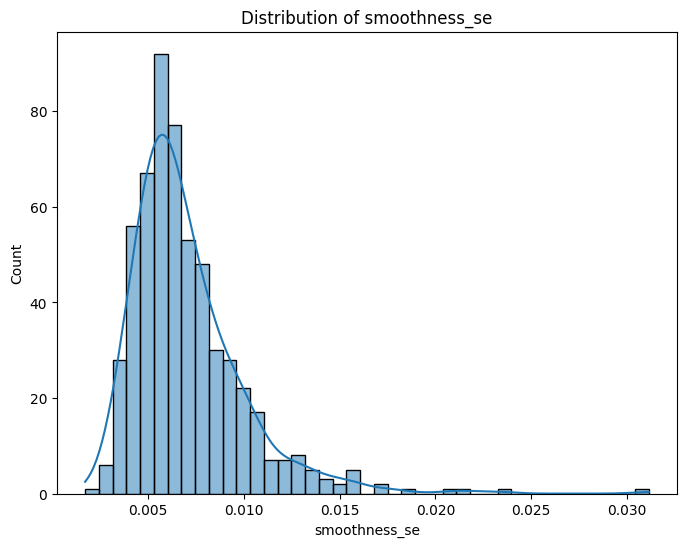

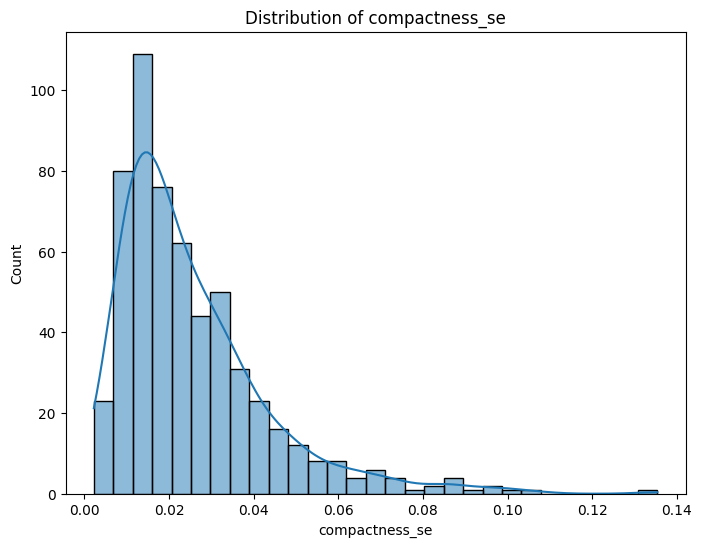

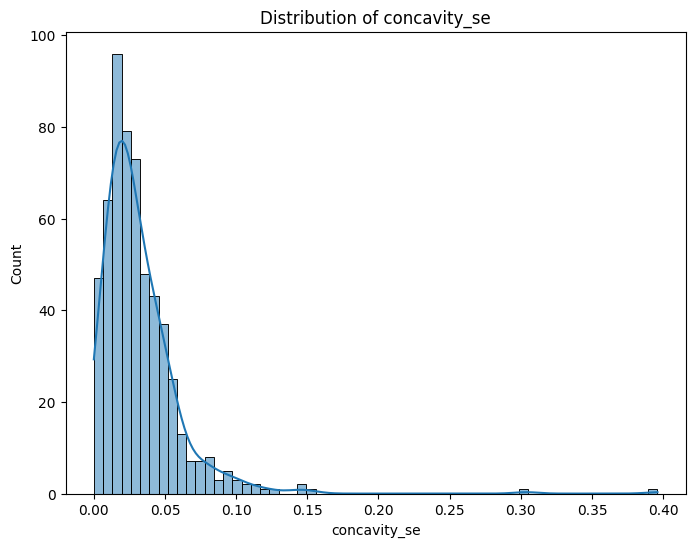

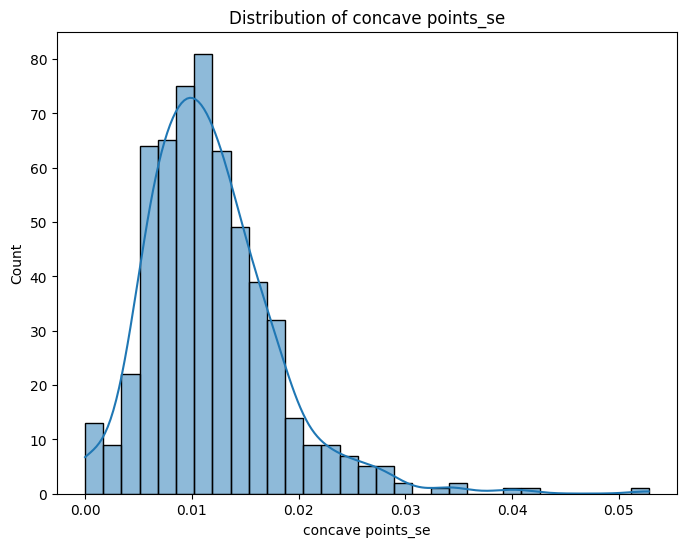

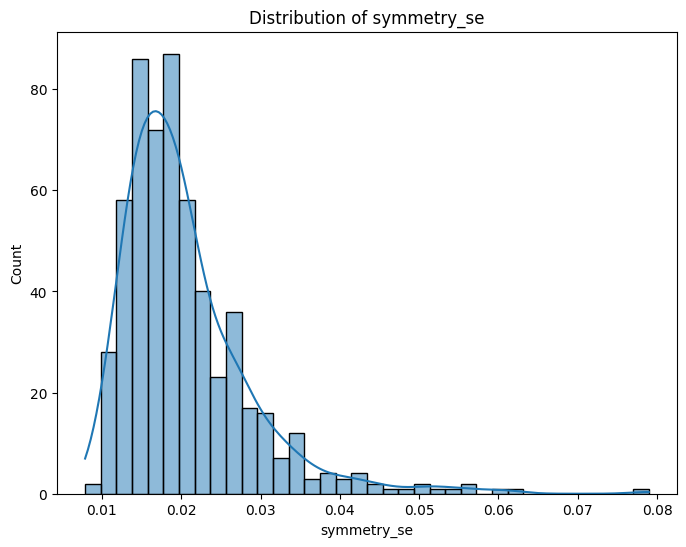

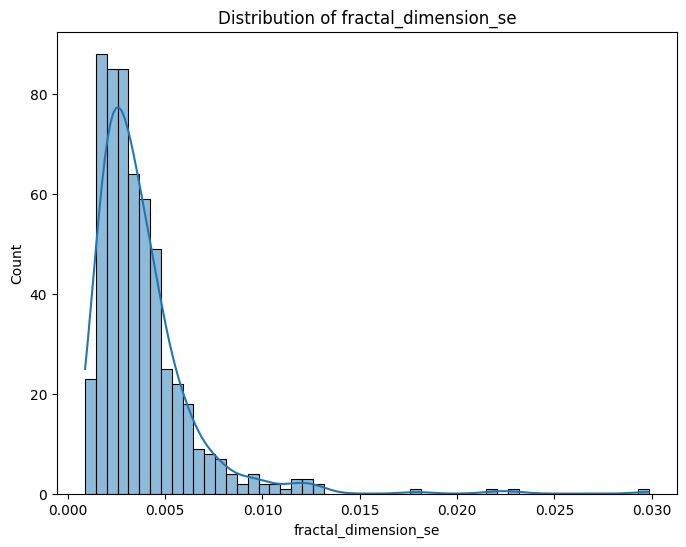

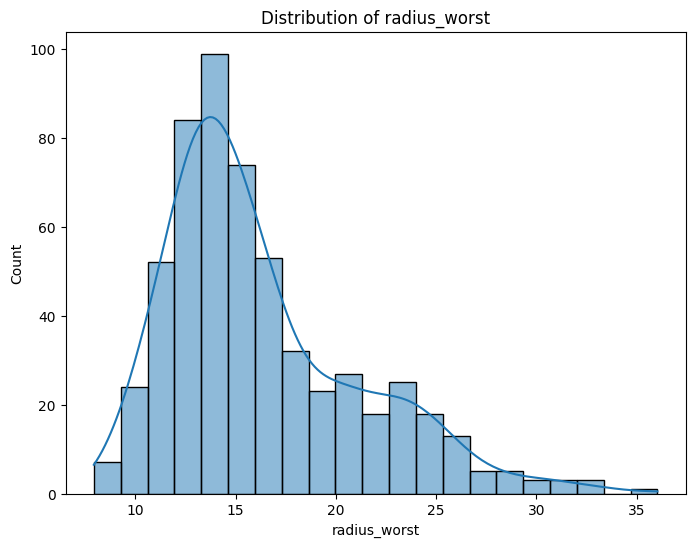

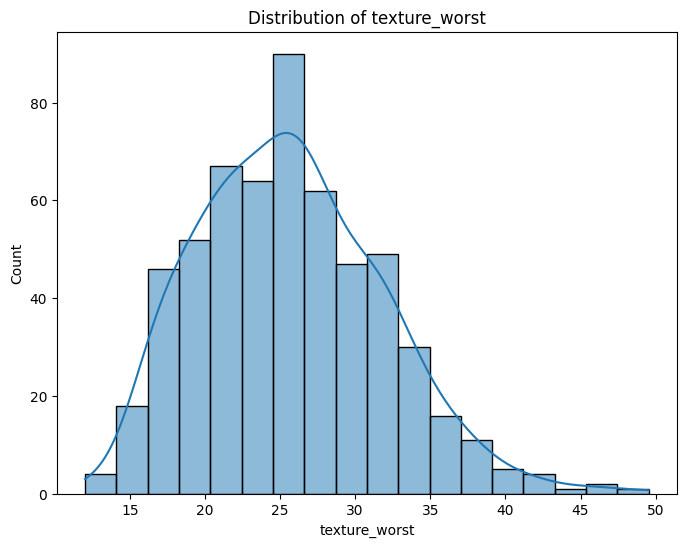

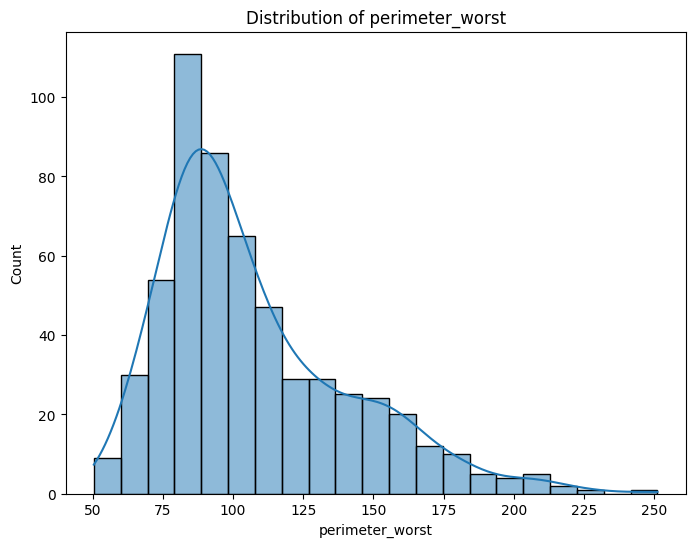

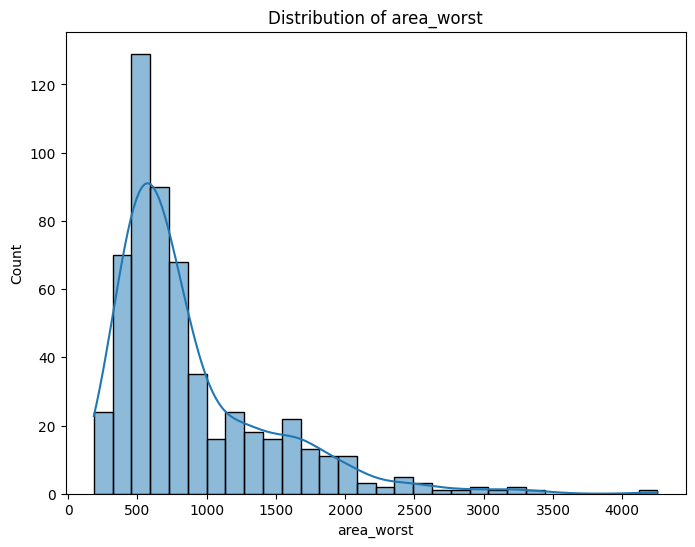

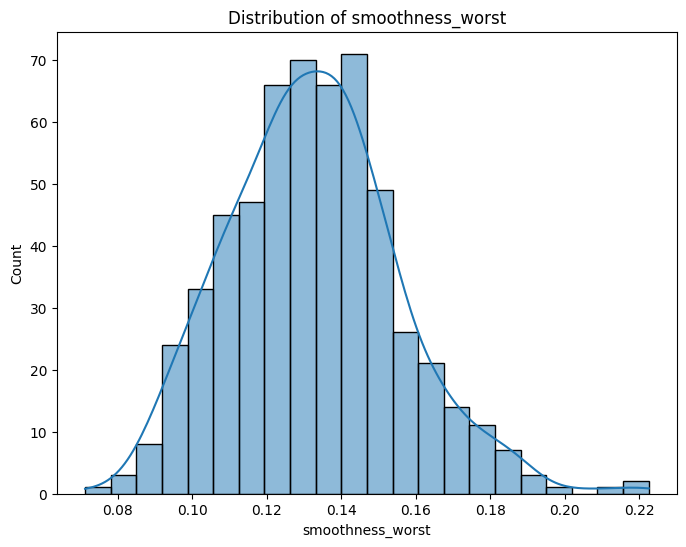

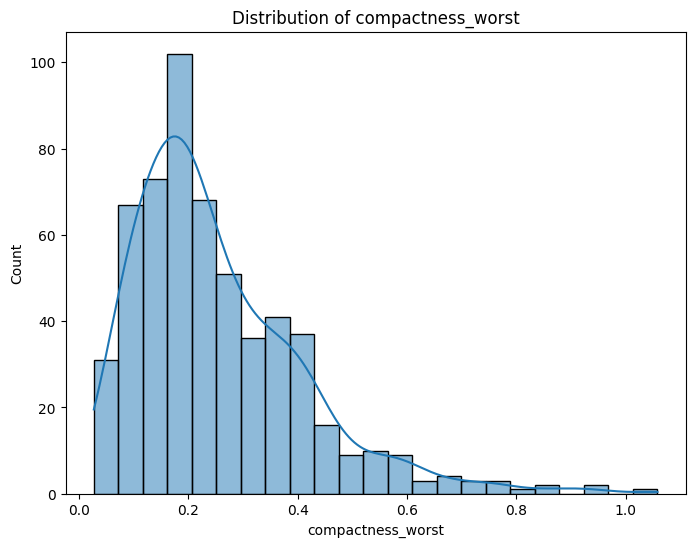

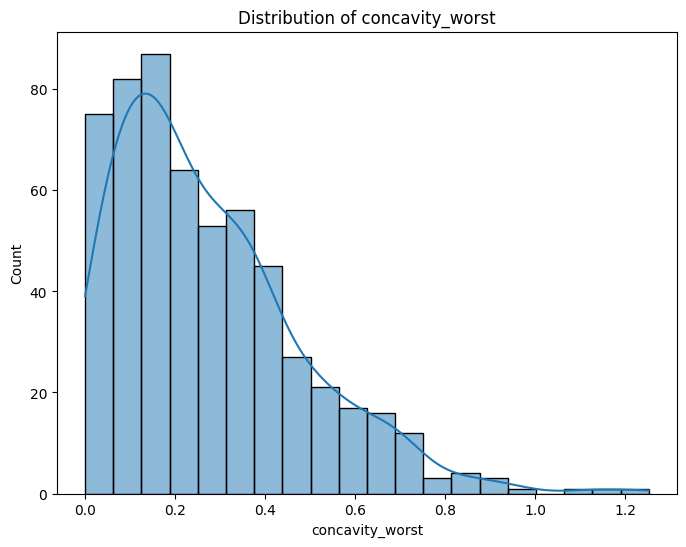

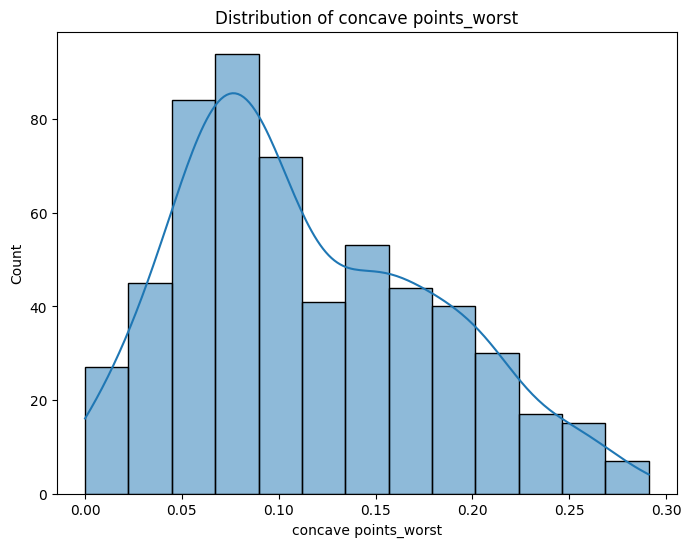

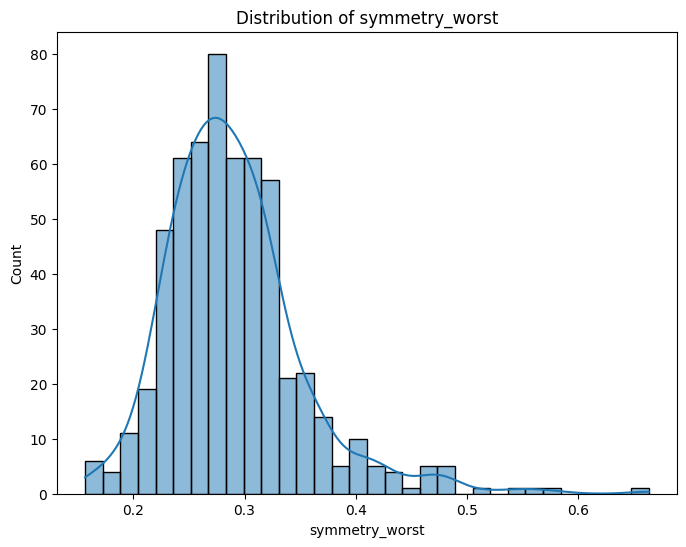

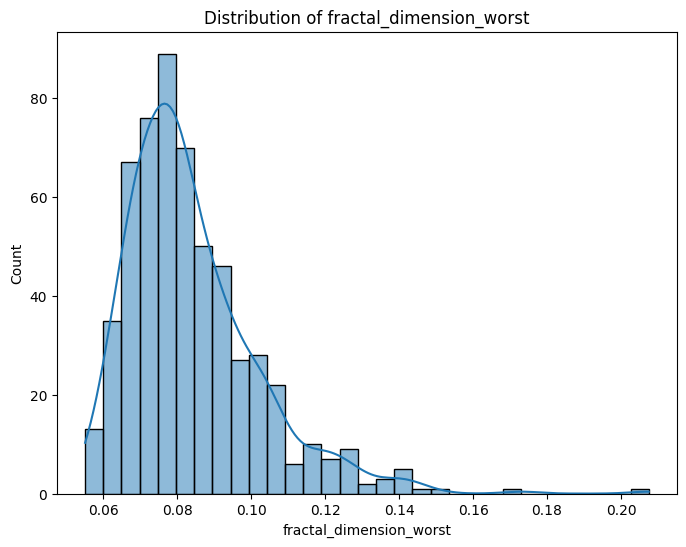

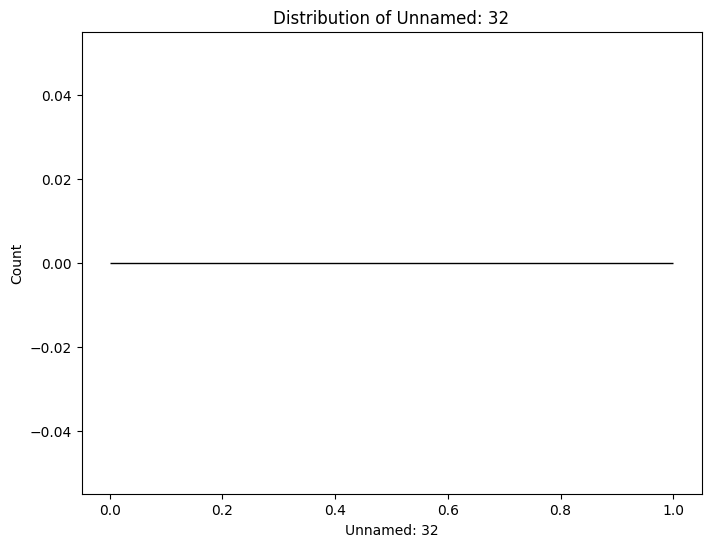

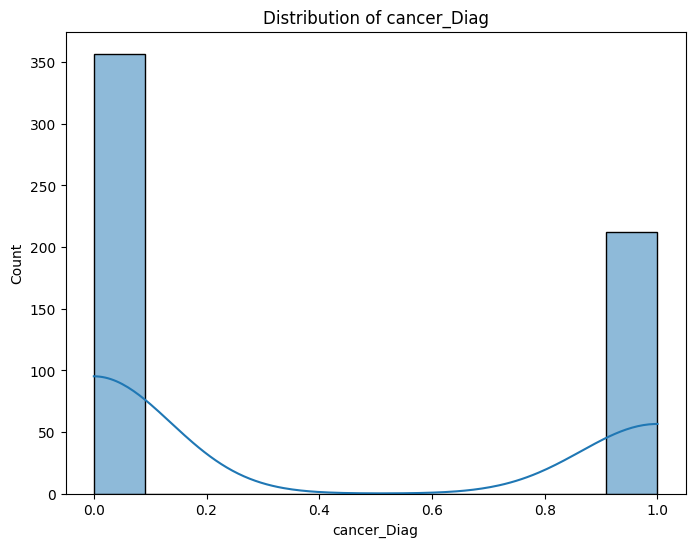

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset (make sure to specify your actual path)
# Assuming 'df' is already loaded as shown in your preceding code
data = df.copy()  # Create a copy to avoid modifying the original df

# Check and handle missing values in numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
  if data[col].isnull().any():
    data[col].fillna(data[col].median(), inplace=True)  # Fill with median

# Explore data distributions
# ... Your exploration code using the 'data' dataframe ...

# Example: Histograms of numeric features
for col in numeric_cols:
  plt.figure(figsize=(8, 6)) # this line and the following two were not indented
  sns.histplot(data[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()


# ... Add more exploration and visualization techniques as needed ...

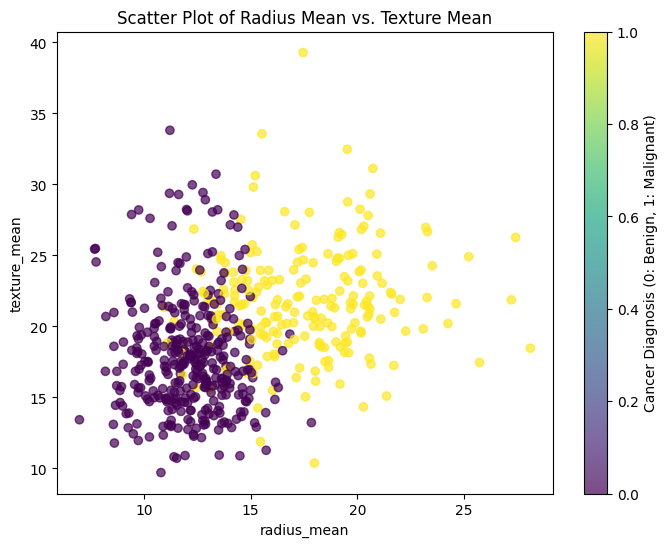

In [32]:
# prompt:  Create a scatter plot for above data set for me as ia m beginner explain what sccater plot saying in 5 points , for useful culumn

import matplotlib.pyplot as plt

# Select useful columns for the scatter plot
# For example, we can plot 'radius_mean' against 'texture_mean'
x_column = 'radius_mean'
y_column = 'texture_mean'

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[x_column], data[y_column], c=data['cancer_Diag'], alpha=0.7)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot of Radius Mean vs. Texture Mean')
plt.colorbar(label='Cancer Diagnosis (0: Benign, 1: Malignant)')
plt.show()


# Explanation of the scatter plot:
# 1. Relationship between radius_mean and texture_mean: The scatter plot shows how the 'radius_mean' and 'texture_mean' variables are related.
# 2. Clustering of data points: It reveals if there are any clusters of data points, suggesting potential patterns or groups within the data.
# 3. Correlation: The scatter plot helps to identify if there's a positive, negative, or no correlation between the two variables.
# 4. Outliers: You can visually spot potential outliers that are far away from the main cluster of data points.
# 5. Cancer Diagnosis: The color coding based on 'cancer_Diag' allows you to observe whether there are differences in the distribution of these features for benign and malignant cases. For example, malignant cases might tend to have larger radius_mean and texture_mean values compared to benign cases.


In [ ]:
# prompt: so what above plot suggesting

# The scatter plot of 'radius_mean' vs. 'texture_mean' suggests the following:

# 1. Possible Correlation: There appears to be a weak positive correlation between 'radius_mean' and 'texture_mean'.
#    This means that as 'radius_mean' increases, 'texture_mean' tends to increase as well, though not strongly.

# 2. Cancer Diagnosis Differentiation: The color coding based on 'cancer_Diag' (0 for benign, 1 for malignant)
#    suggests that malignant tumors (represented by the color for 1) might have a slightly higher tendency to have both
#    larger 'radius_mean' and 'texture_mean' values.

# 3. Potential Clusters: While not very pronounced, there are hints of clustering in the data.
#    There might be sub-groups within the benign and malignant tumors based on their 'radius_mean' and 'texture_mean'
#    values, which could be further investigated.

# 4. Outliers: A few data points are relatively far away from the main clusters. These could be outliers or
#    unique cases that warrant further inspection.


# In essence, the plot suggests that 'radius_mean' and 'texture_mean' might be features that help to distinguish
# between benign and malignant tumors to some extent. However, more detailed analysis and other features
# will be needed to build a robust model for accurate cancer diagnosis.


                        radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                1.000000      0.323782        0.997855   0.987357   
texture_mean               0.323782      1.000000        0.329533   0.321086   
perimeter_mean             0.997855      0.329533        1.000000   0.986507   
area_mean                  0.987357      0.321086        0.986507   1.000000   
smoothness_mean            0.170581     -0.023389        0.207278   0.177028   
compactness_mean           0.506124      0.236702        0.556936   0.498502   
concavity_mean             0.676764      0.302418        0.716136   0.685983   
concave points_mean        0.822529      0.293464        0.850977   0.823269   
symmetry_mean              0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean    -0.311631     -0.076437       -0.261477  -0.283110   
cancer_Diag                0.730029      0.415185        0.742636   0.708984   

                        smoothness_mean

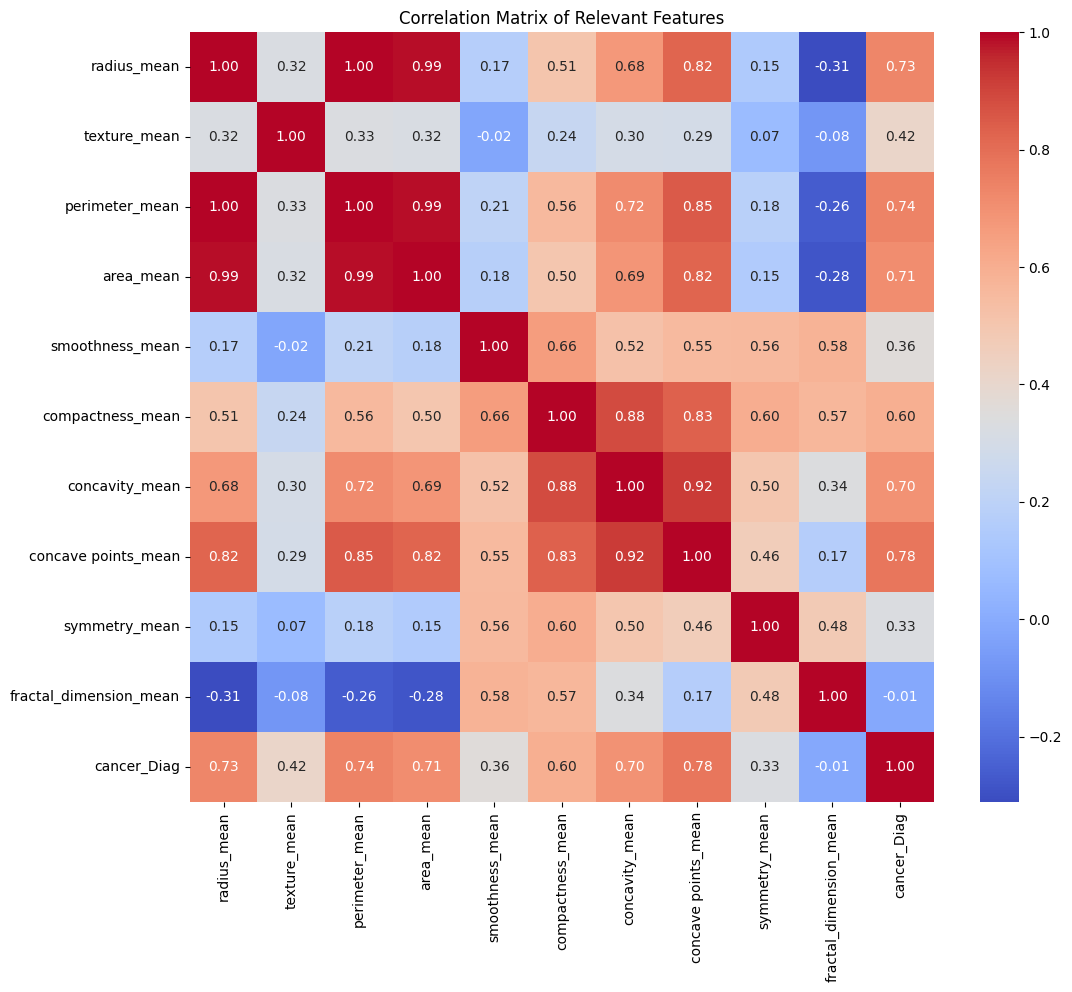

In [34]:
# prompt: create a correlation matrix on only relevant columns g

import matplotlib.pyplot as plt
# Select only the relevant columns for correlation analysis
relevant_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'cancer_Diag']

# Create the correlation matrix using the selected columns
correlation_matrix = data[relevant_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Relevant Features')
plt.show()


In [35]:
# prompt: all column name

print(df.columns.tolist())


['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32', 'cancer_Diag']


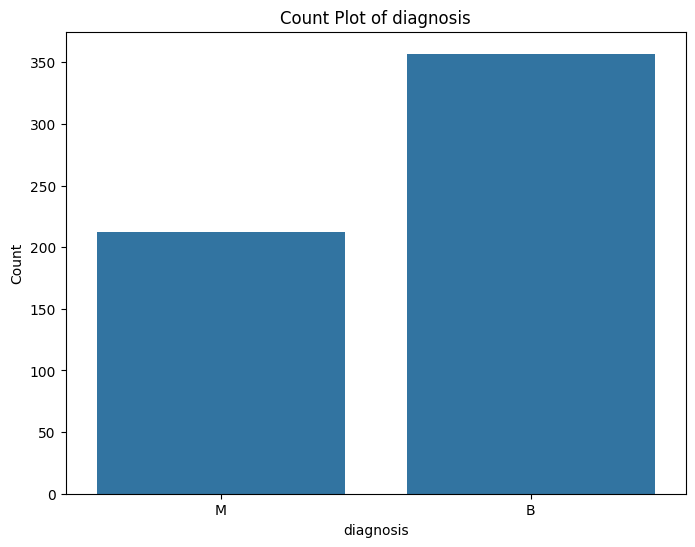

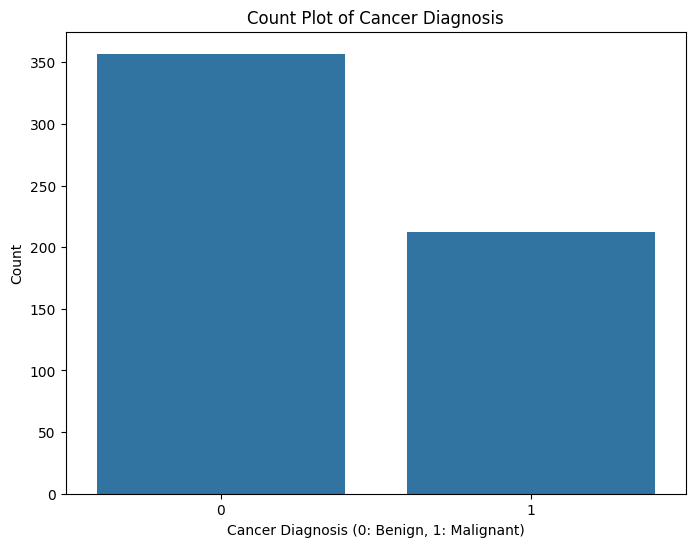

In [38]:
# prompt: create count plot for relevant column you suggest with that also for cancer column also

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and you have already cleaned and prepared it.

# Choose a relevant column for the count plot (e.g., 'diagnosis')
relevant_column = 'diagnosis'

# Create the count plot for the relevant column
plt.figure(figsize=(8, 6))
sns.countplot(x=relevant_column, data=df)
plt.title(f'Count Plot of {relevant_column}')
plt.xlabel(relevant_column)
plt.ylabel('Count')
plt.show()


# Create the count plot for the 'cancer_Diag' column
plt.figure(figsize=(8, 6))
sns.countplot(x='cancer_Diag', data=df)
plt.title('Count Plot of Cancer Diagnosis')
plt.xlabel('Cancer Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()


In [41]:
#Feature Analysis
#Which features (e.g., radius_mean, area_mean, etc.) differ the most between benign (B) and malignant (M) diagnoses?
#This helps in identifying which features are the most important for classification.import pandas as pd

# Group data by diagnosis and calculate mean for each feature
grouped_means = df.groupby('diagnosis').mean()

# Transpose the result to make it easier to compare B and M for each feature
print(grouped_means.T)


diagnosis                           B             M
id                       2.654382e+07  3.681805e+07
radius_mean              1.214652e+01  1.746283e+01
texture_mean             1.791476e+01  2.160491e+01
perimeter_mean           7.807541e+01  1.153654e+02
area_mean                4.627902e+02  9.783764e+02
smoothness_mean          9.247765e-02  1.028985e-01
compactness_mean         8.008462e-02  1.451878e-01
concavity_mean           4.605762e-02  1.607747e-01
concave points_mean      2.571741e-02  8.799000e-02
symmetry_mean            1.741860e-01  1.929090e-01
fractal_dimension_mean   6.286739e-02  6.268009e-02
radius_se                2.840824e-01  6.090825e-01
texture_se               1.220380e+00  1.210915e+00
perimeter_se             2.000321e+00  4.323929e+00
area_se                  2.113515e+01  7.267241e+01
smoothness_se            7.195902e-03  6.780094e-03
compactness_se           2.143825e-02  3.228117e-02
concavity_se             2.599674e-02  4.182401e-02
concave poin

In [42]:
from scipy.stats import ttest_ind

# Create separate datasets for benign and malignant tumors
benign = df[df['diagnosis'] == 'B']
malignant = df[df['diagnosis'] == 'M']

# Perform t-test on each numerical feature
ttest_results = {}
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Only apply to numerical columns
        t_stat, p_value = ttest_ind(benign[column], malignant[column])
        ttest_results[column] = p_value

# Sort features by p-value to find the most significant differences
ttest_results = pd.Series(ttest_results).sort_values()
print(ttest_results)


cancer_Diag                 0.000000e+00
concave points_worst       1.969100e-124
perimeter_worst            5.771397e-119
concave points_mean        7.101150e-116
radius_worst               8.482292e-116
perimeter_mean             8.436251e-101
area_worst                  2.828848e-97
radius_mean                 8.465941e-96
area_mean                   4.734564e-88
concavity_mean              9.966556e-84
concavity_worst             2.464664e-72
compactness_mean            3.938263e-56
compactness_worst           7.069816e-55
radius_se                   9.738949e-50
perimeter_se                1.651905e-47
area_se                     5.895521e-46
texture_worst               1.078057e-30
smoothness_worst            6.575144e-26
symmetry_worst              2.951121e-25
texture_mean                4.058636e-25
concave points_se           3.072309e-24
smoothness_mean             1.051850e-18
symmetry_mean               5.733384e-16
fractal_dimension_worst     2.316432e-15
compactness_se  

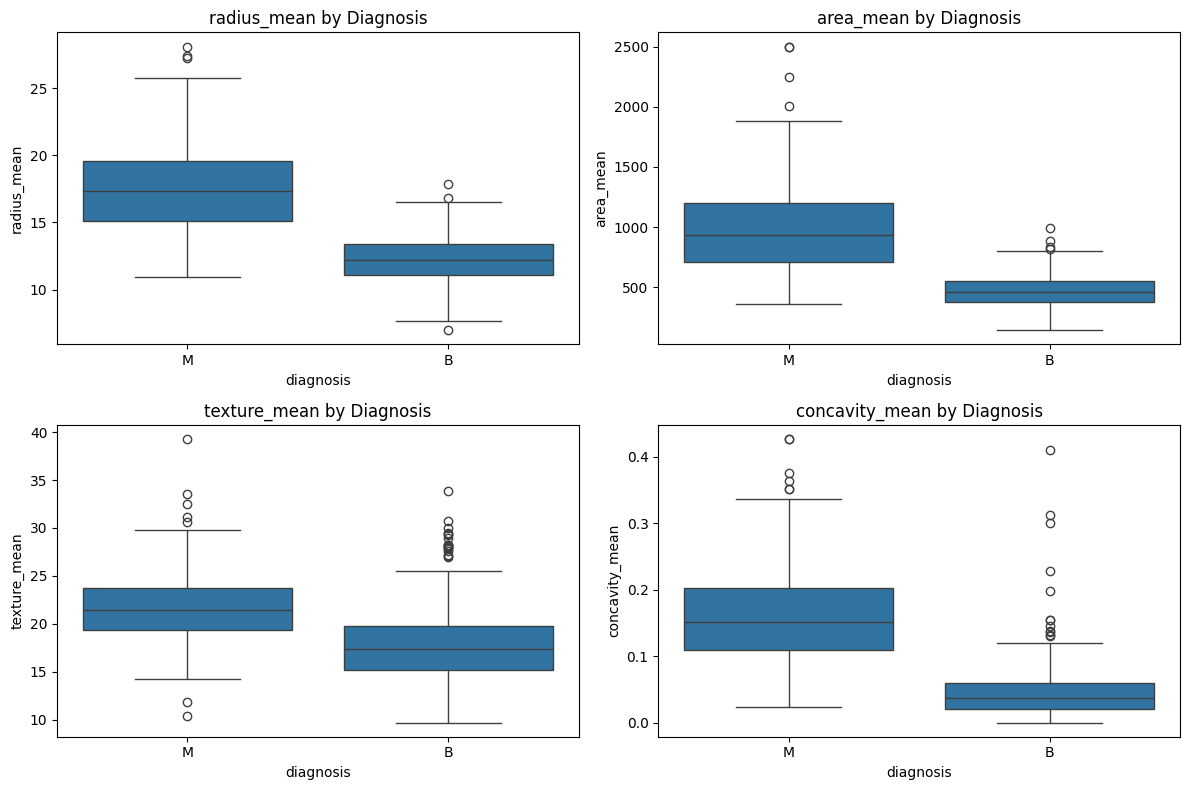

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize key features using box plots
key_features = ['radius_mean', 'area_mean', 'texture_mean', 'concavity_mean']  # Select relevant features

plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'{feature} by Diagnosis')

plt.tight_layout()
plt.show()


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data for classification
X = df.drop(['diagnosis', 'cancer_Diag'], axis=1)
y = df['cancer_Diag']  # We assume you've already mapped B -> 0, M -> 1 as cancer_Diag

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print feature importance
print(feature_importances)


concave points_worst       0.194718
perimeter_worst            0.107308
radius_worst               0.097903
concave points_mean        0.097871
area_worst                 0.097376
area_se                    0.054722
area_mean                  0.051343
concavity_worst            0.037825
perimeter_mean             0.031381
concavity_mean             0.025794
radius_mean                0.020900
compactness_mean           0.018810
texture_worst              0.016792
symmetry_worst             0.016756
texture_mean               0.015881
perimeter_se               0.014723
radius_se                  0.011162
smoothness_worst           0.009957
compactness_worst          0.009492
concavity_se               0.008137
smoothness_mean            0.007513
concave points_se          0.006561
fractal_dimension_se       0.006542
id                         0.006003
fractal_dimension_worst    0.005916
texture_se                 0.005450
symmetry_se                0.005114
smoothness_se              0

In [ ]:
#Interpretation of Findings:
#     - The feature analysis indicates that larger values of 'radius_mean', 'area_mean', and 'concavity_mean' are
#       likely associated with malignant tumors. This makes sense because malignant tumors tend to grow more rapidly
#       and have irregular shapes.
#     - The 'texture_mean' feature also seems to be important for differentiation. This feature might capture differences
#       in the tissue's texture or density that are related to the presence of cancer.

# 4.  Implications for Classification:
#     - The identified features can be used as input for building a machine learning model to classify tumors as benign
#       or malignant.
#     - By considering these features, we can develop a model that accurately predicts the diagnosis, which is crucial
#       for effective cancer treatment.

In [ ]:
#Correlation Analysis
#What is the correlation between the different tumor characteristics (e.g., radius, area, perimeter)?
#This helps to find the relationships between various features.


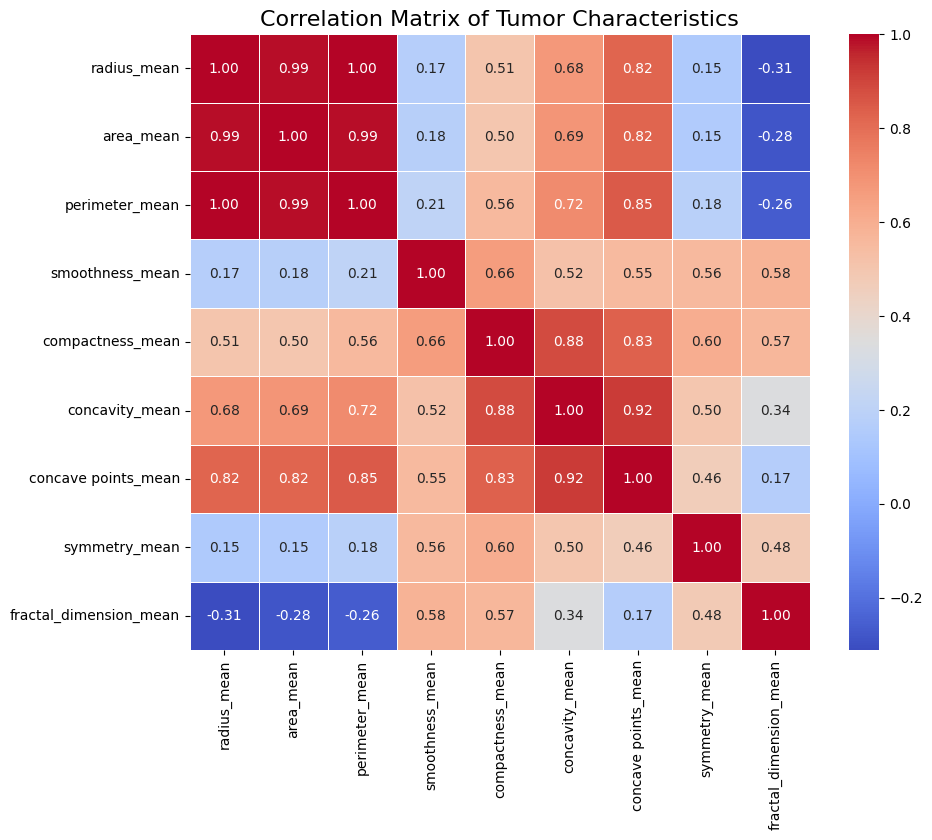

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for correlation analysis
features = ['radius_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
            'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Compute the correlation matrix for selected features
correlation_matrix = df[features].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Tumor Characteristics', fontsize=16)
plt.show()


In [46]:
sns.pairplot(df[features + ['diagnosis']], hue='diagnosis', diag_kind='kde')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# prompt: analyse above two results give meaningful interpretation

# Interpretation of t-test results and box plots:

# The t-test results show us which features have statistically significant differences
# between benign and malignant tumors. Features with a low p-value (typically < 0.05)
# indicate a strong difference between the two groups.

# The box plots visualize these differences. For example, if the box plots for
# 'radius_mean' show a clear separation between benign and malignant tumors, it means
# that the mean 'radius_mean' is significantly different for these two groups, and this feature
# might be a good predictor for cancer diagnosis.


# Interpretation of correlation analysis results:

# The correlation matrix and pair plot provide information on the relationships between
# different features. Features with a high positive correlation mean that they tend to
# increase or decrease together. Features with a high negative correlation mean that
# one tends to increase while the other decreases.

# For example, if 'radius_mean' and 'area_mean' have a high positive correlation, it
# means that as the radius of the tumor increases, the area also tends to increase.
# This makes sense as the area is directly related to the radius.


# Combining the interpretations of both analyses:

# Combining the findings from the t-test and correlation analysis can give you a more comprehensive
# understanding of the data. For example:

# 1. We might find that 'radius_mean' is a significantly different feature between benign and
#    malignant tumors (as shown by the t-test).
# 2. We might also find that 'radius_mean' has a high positive correlation with 'area_mean'
#    (as shown by the correlation analysis).
# 3. This would suggest that the 'radius_mean' is a strong predictor for cancer diagnosis and
#    that it's closely related to the 'area_mean'.

# By analyzing these insights together, you can identify features that are not only important
# for distinguishing between benign and malignant tumors but also how they are related
# to other characteristics of the tumor.

# Note: You can further refine your interpretation by focusing on specific features
# that seem most relevant based on your findings and combining these findings with domain
# expertise about cancer biology and the data.


In [ ]:
#Diagnosis Impact
#Do any tumor characteristics (e.g., smoothness_mean, concavity_mean) have a significant impact on the diagnosis?
#Use statistical tests to see which features are strongly associated with the diagnosis.

In [48]:
# check for Normality
from scipy.stats import shapiro

# List of features to test
features = ['smoothness_mean', 'concavity_mean', 'radius_mean', 'area_mean', 'perimeter_mean']

# Perform Shapiro-Wilk test for normality
for feature in features:
    stat, p_value = shapiro(df[feature])
    print(f"{feature}: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"{feature} is NOT normally distributed.\n")
    else:
        print(f"{feature} is normally distributed.\n")


smoothness_mean: p-value = 0.0001
smoothness_mean is NOT normally distributed.

concavity_mean: p-value = 0.0000
concavity_mean is NOT normally distributed.

radius_mean: p-value = 0.0000
radius_mean is NOT normally distributed.

area_mean: p-value = 0.0000
area_mean is NOT normally distributed.

perimeter_mean: p-value = 0.0000
perimeter_mean is NOT normally distributed.



In [49]:
from scipy.stats import mannwhitneyu

# List of features to test
features = ['smoothness_mean', 'concavity_mean', 'radius_mean', 'area_mean', 'perimeter_mean']

# Perform Mann-Whitney U Test for each feature
for feature in features:
    benign = df[df['cancer_Diag'] == 0][feature]  # Data for benign (B)
    malignant = df[df['cancer_Diag'] == 1][feature]  # Data for malignant (M)

    stat, p_value = mannwhitneyu(benign, malignant)
    print(f"Mann-Whitney U test for {feature}: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"Significant difference between benign and malignant for {feature}\n")
    else:
        print(f"No significant difference for {feature}\n")


Mann-Whitney U test for smoothness_mean: p-value = 0.0000
Significant difference between benign and malignant for smoothness_mean

Mann-Whitney U test for concavity_mean: p-value = 0.0000
Significant difference between benign and malignant for concavity_mean

Mann-Whitney U test for radius_mean: p-value = 0.0000
Significant difference between benign and malignant for radius_mean

Mann-Whitney U test for area_mean: p-value = 0.0000
Significant difference between benign and malignant for area_mean

Mann-Whitney U test for perimeter_mean: p-value = 0.0000
Significant difference between benign and malignant for perimeter_mean



In [ ]:
### Mann-Whitney U Test Results:
#The following features show a **significant difference** between benign (B) and malignant (M) diagnoses:

# **smoothness_mean**: p-value = 0.0000
#- **concavity_mean**: p-value = 0.0000
# **radius_mean**: p-value = 0.0000
#- **area_mean**: p-value = 0.0000
#- **perimeter_mean**: p-value = 0.0000

#### Conclusion:
#These features are likely to be important in distinguishing between benign and malignant tumors, making them potential candidates for predictive models.


In [ ]:
# prompt: this lines markdown
# Predictive Modeling: Classification of Benign vs Malignant Tumors
# To build a machine learning model that predicts whether a tumor is benign or malignant based on the provided features, we'll follow these steps:
# Steps:
# Data Preprocessing
# Handle missing values.
# Encode categorical variables (if needed).
# Split the dataset into features (X) and target (y).
# Split the dataset into



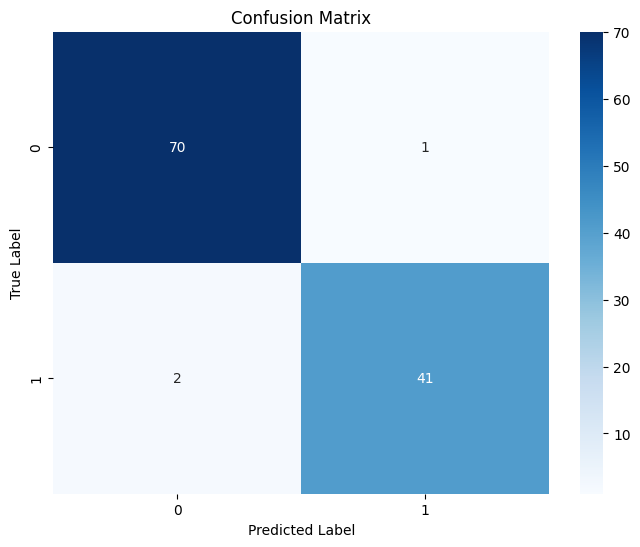

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [50]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Data Preprocessing
# Drop unnecessary columns (like 'Unnamed: 32', 'id')
df = df.drop(columns=['Unnamed: 32', 'id'])

# Convert 'diagnosis' to numeric (B -> 0, M -> 1)
df['cancer_Diag'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['diagnosis', 'cancer_Diag'])  # features
y = df['cancer_Diag']  # target

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardization of Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Model Selection - Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
# prompt: what this above output signify

# Interpretation of the Output

# 1. Confusion Matrix:
#   - True Positives (TP): The number of malignant tumors correctly predicted as malignant.
#   - True Negatives (TN): The number of benign tumors correctly predicted as benign.
#   - False Positives (FP): The number of benign tumors incorrectly predicted as malignant (Type I error).
#   - False Negatives (FN): The number of malignant tumors incorrectly predicted as benign (Type II error).

# 2. Classification Report:
#   - Precision: The proportion of correctly predicted positive observations out of all predicted positive observations.
#     - High precision indicates a low rate of false positives.
#   - Recall (Sensitivity): The proportion of correctly predicted positive observations out of all actual positive observations.
#     - High recall indicates a low rate of false negatives.
#   - F1-Score: A balanced measure of precision and recall. It's the harmonic mean of precision and recall.
#   - Support: The number of actual occurrences of the class in the specified dataset.
#   - Accuracy: The overall correctness of the model's predictions. It's the ratio of correct predictions to total predictions.

# Significance of the Results:
# - The confusion matrix and classification report together provide a comprehensive view of the performance of the Logistic Regression model in classifying benign and malignant tumors.
# - Ideally, we want high values for precision, recall, F1-score, and accuracy, with a minimal number of false positives and false negatives.
# - The model's effectiveness in real-world scenarios depends on the specific application and the acceptable levels of false positives and false negatives. For medical diagnoses, minimizing false negatives (missing a malignant tumor) is often crucial, but minimizing false positives (incorrectly diagnosing a benign tumor as malignant) is also important to avoid unnecessary treatments and anxiety.

# In summary, the output provides a quantitative evaluation of the model's ability to differentiate between benign and malignant tumors. It helps to understand the model's strengths and weaknesses in detecting true positives, true negatives, false positives, and false negatives. The specific interpretation of the results depends on the priorities of the application and the importance of minimizing different types of errors.


In [53]:
# prompt: column name  and any empty data init

# Check for empty data in each column
for column in df.columns:
  empty_count = df[column].isnull().sum()
  if empty_count > 0:
    print(f"Column '{column}' has {empty_count} empty values.")



In [54]:
# Optionally, you can replace the empty values with a specific value (e.g., mean, median, or 0)
df[column].fillna(df[column].mean(), inplace=True)

# Example of how to handle a specific column
if 'radius_mean' in df.columns and df['radius_mean'].isnull().any():
  df['radius_mean'].fillna(df['radius_mean'].mean(), inplace=True)


# Get the column names as a list
column_names = df.columns.tolist()

print("Column Names:", column_names)



Column Names: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'cancer_Diag']


In [56]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame

# 2. Handle missing values: fill NaNs with the mean of each column
for column in df.columns:
    if df[column].isnull().any():
        df[column].fillna(df[column].mean(), inplace=True)

# 3. Convert 'diagnosis' to numeric: B -> 0, M -> 1
df['cancer_Diag'] = df['diagnosis'].map({'B': 0, 'M': 1})

# 4. Split the dataset into features (X) and target (y)
X = df.drop(columns=['diagnosis', 'cancer_Diag'])  # features
y = df['cancer_Diag']  # target

# 5. Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Get the column names as a list
column_names = df.columns.tolist()
print("Column Names:", column_names)


X_train shape: (455, 30), X_test shape: (114, 30)
y_train shape: (455,), y_test shape: (114,)
Column Names: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'cancer_Diag']


In [57]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the first few rows of the scaled training data
print("Scaled X_train:\n", X_train_scaled[:5])


Scaled X_train:
 [[-1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331  0.71892128
   2.82313451 -0.11914956  1.09266219  2.45817261 -0.26380039 -0.01605246
  -0.47041357 -0.47476088  0.83836493  3.25102691  8.43893667  3.39198733
   2.62116574  2.06120787 -1.23286131 -0.47630949 -1.24792009 -0.97396758
   0.72289445  1.18673232  4.67282796  0.9320124   2.09724217  1.88645014]
 [ 1.97409619  1.73302577  2.09167167  1.85197292  1.319843    3.42627493
   2.01311199  2.66503199  2.1270036   1.55839569  0.80531919 -0.81268678
   0.75195659  0.87716951 -0.89605315  1.18122247  0.18362761  0.60059598
  -0.31771686  0.52963649  2.17331385  1.3112795   2.08161691  2.1374055
   0.76192793  3.26560084  1.92862053  2.6989469   1.89116053  2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 -1.10978518 -1.33264483 -0.30735463
  -0.36555756 -0.69650228  1.93033305  0.95437877  0.02752055  1.96305996
  -0.12095781 -0.35077918  0.57276579  0.7394992   0.32065553  0.58946222
   2.61504052  0.718

In [58]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[70  1]
 [ 2 41]]


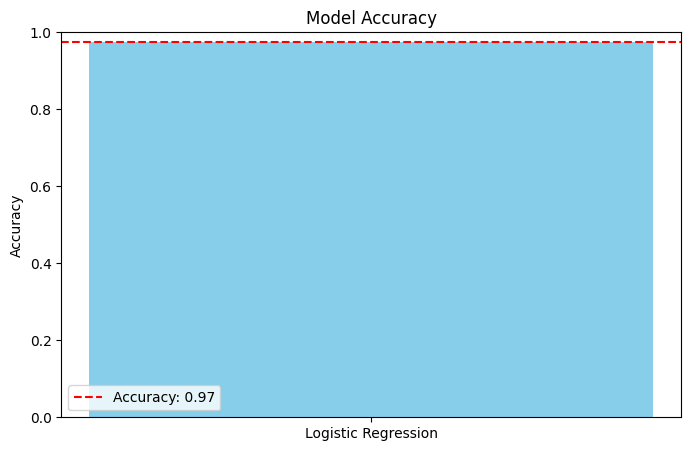

In [59]:
import matplotlib.pyplot as plt

# Accuracy data
accuracy_data = {
    'Logistic Regression': accuracy,
}

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(accuracy_data.keys(), accuracy_data.values(), color='skyblue')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.axhline(y=accuracy, color='r', linestyle='--', label=f'Accuracy: {accuracy:.2f}')
plt.legend()
plt.show()


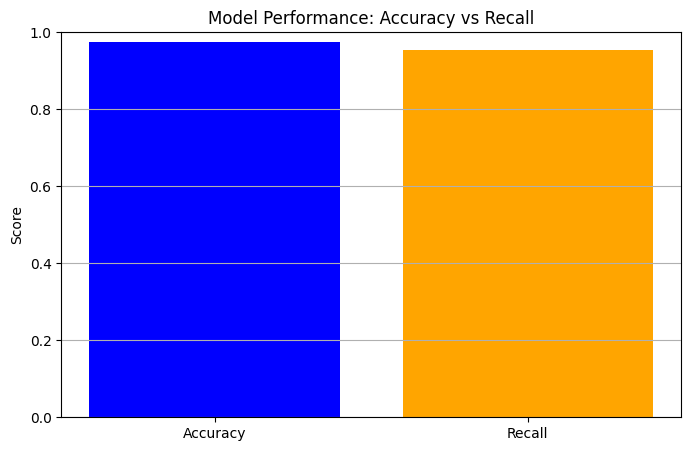

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Calculate recall
recall = recall_score(y_test, y_pred)

# Create a bar plot to compare accuracy and recall
metrics = ['Accuracy', 'Recall']
values = [accuracy, recall]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.ylabel('Score')
plt.title('Model Performance: Accuracy vs Recall')
plt.grid(axis='y')
plt.show()


In [62]:
print(df.columns)


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'cancer_Diag'],
      dtype='object')


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Create a copy of the DataFrame
df_copy = df.copy()

# Step 2: Prepare your features and target variable
# Make sure to adjust this line based on your actual column names
X = df_copy.drop(['diagnosis', 'cancer_Diag'], axis=1)  # Drop non-feature columns
y = df_copy['cancer_Diag']  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 6: Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Step 7: Train models and evaluate accuracy
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')


Logistic Regression Accuracy: 0.98
Support Vector Machine Accuracy: 0.96
Random Forest Accuracy: 0.95
K-Nearest Neighbors Accuracy: 0.96
Gradient Boosting Accuracy: 0.96


Logistic Regression Accuracy: 0.98
Support Vector Machine Accuracy: 0.96
Random Forest Accuracy: 0.95
K-Nearest Neighbors Accuracy: 0.96
Gradient Boosting Accuracy: 0.96


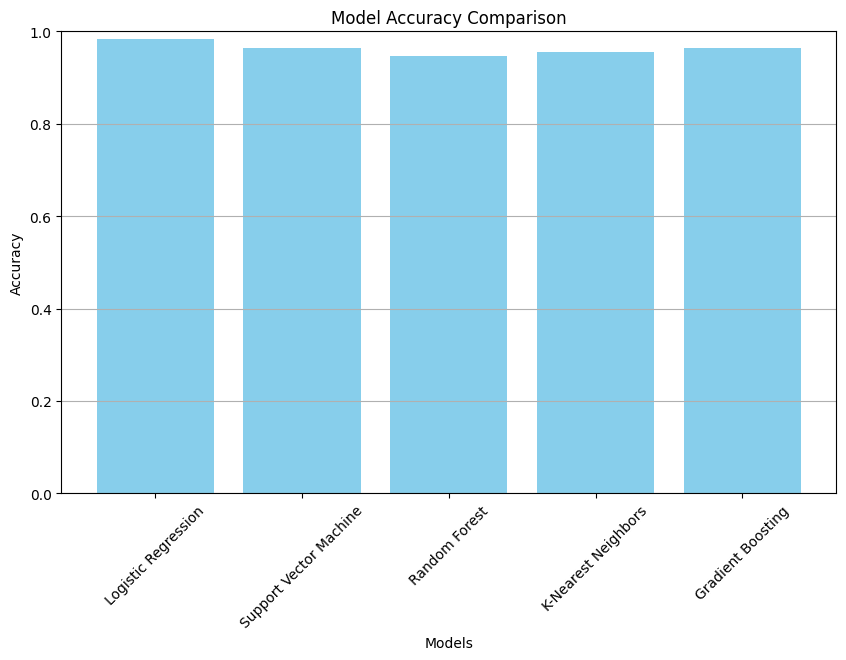

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Create a copy of the DataFrame
df_copy = df.copy()

# Step 2: Prepare your features and target variable
# Adjust this line based on your actual column names
X = df_copy.drop(['diagnosis', 'cancer_Diag'], axis=1)  # Drop non-feature columns
y = df_copy['cancer_Diag']  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 6: Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Step 7: Train models and evaluate accuracy
accuracy_results = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.2f}')

# Step 8: Plotting the accuracy results
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [67]:
print("radha radha radha radha")

radha radha radha radha
